In [73]:
from sklearn.datasets import make_regression, load_diabetes
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import time

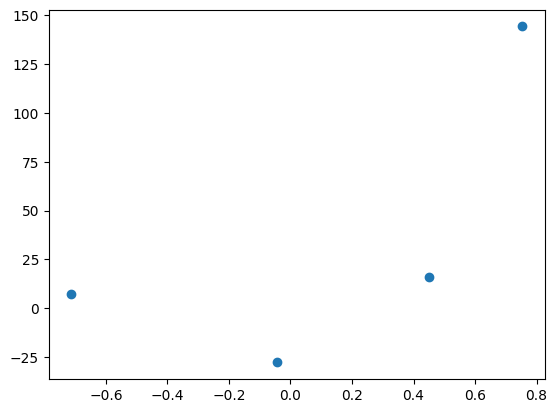

In [3]:
X,y = make_regression(n_samples = 4, n_features = 1, n_informative = 1, n_targets = 1, noise = 80, random_state = 13)
plt.scatter(X,y)

In [4]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [5]:
reg.coef_

array([78.35063668])

In [6]:
reg.intercept_

26.15963284313262

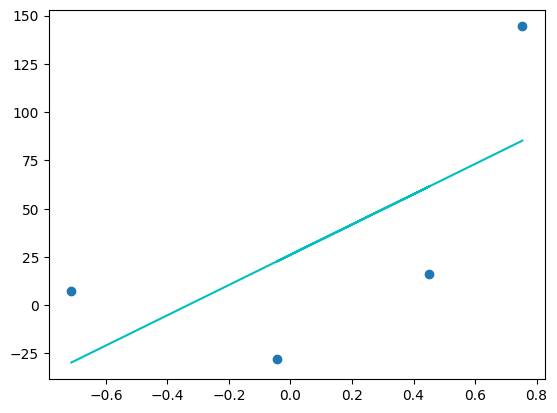

In [7]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color = 'c')

In [8]:
y_pred = ((78.5*X)+0).reshape(4)

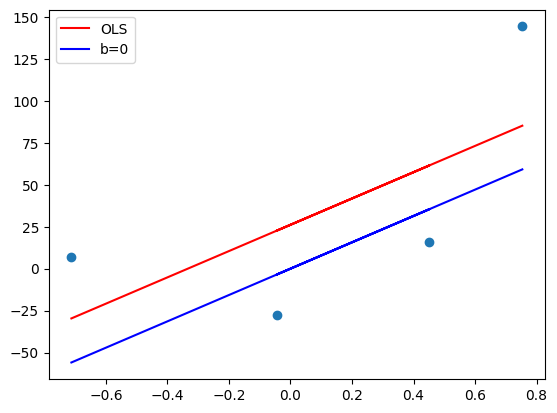

In [9]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color = 'r',label = 'OLS')
plt.plot(X,y_pred,color = 'b',label = 'b=0')
plt.legend()
plt.show()

In [10]:
m = 78.35
b = 0

loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-209.27763408209216

In [11]:
lr = 0.1
step_size = loss_slope * lr
step_size

-20.927763408209216

In [12]:
b = b - step_size
b

20.927763408209216

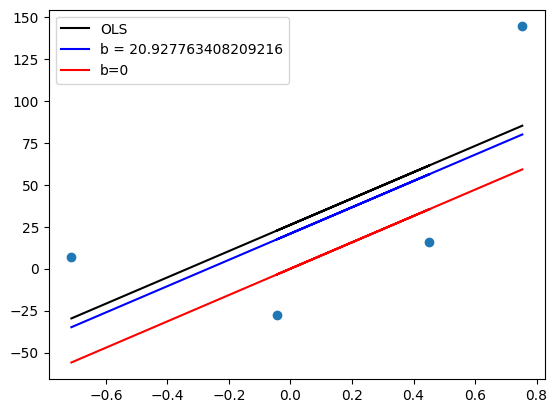

In [13]:
y_pred1 = ((78.35 *X)+b).reshape(4)
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color = 'k',label = 'OLS')
plt.plot(X,y_pred1,color = 'b',label = 'b = {}'.format(b))
plt.plot(X,y_pred,color = 'r',label = 'b=0')
plt.legend()
plt.show()

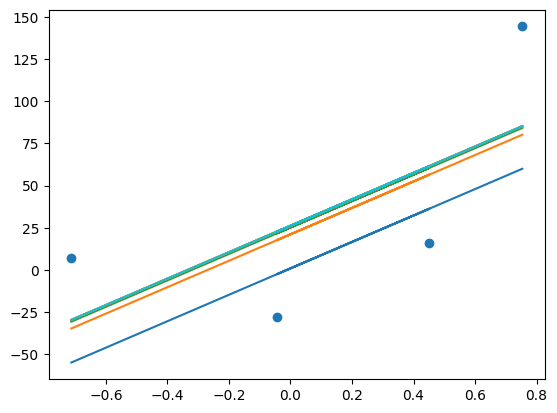

In [14]:
b = -100
m = 78.35
lr = 0.1

epochs = 10
for i in range(epochs):
  loss_slope = -2 *np.sum(y-m*X.ravel()-b)
  b = b - lr*loss_slope

  y_pred = m*X + b
  plt.plot(X,y_pred)
plt.scatter(X,y)

Generated random samples

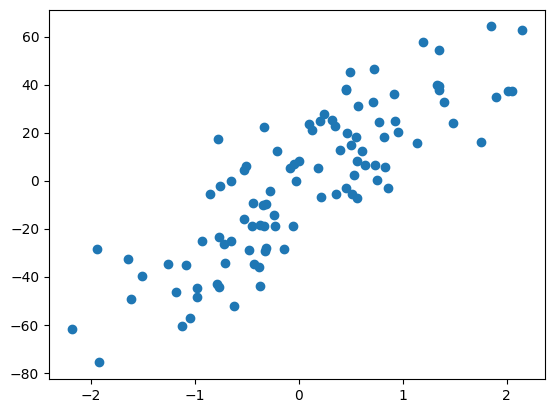

In [15]:
X,y = make_regression(n_samples = 100, n_features = 1, n_informative = 1, n_targets = 1, noise = 20, random_state = 13)
plt.scatter(X,y)

predicted the coeff of m and b using LR

In [16]:
lr1 = LinearRegression()
lr1.fit(X,y)
print(lr1.coef_)
print(lr1.intercept_)

[27.82809103]
-2.29474455867698


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 13)

In [18]:
y_pred = lr1.predict(X_test)

In [19]:
np.mean(cross_val_score(lr1,X,y,scoring = 'r2',cv = 10))

0.6375011587464419

In [20]:
r2_score(y_pred,y_test)

0.6894916158225106

backend code of gradient descent

In [21]:
class Grad_desc:
  def __init__(self,lr,epochs):
      self.m = 100
      self.b = -120
      self.lr = lr
      self.epochs = epochs
  def fit(self,X,y):
      for _ in range(self.epochs):
          loss_slope_b = -2*np.sum(y - self.m*X.ravel() - self.b)
          loss_slope_m = -2*np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
          self.b = self.b - (self.lr * loss_slope_b)
          self.m = self.m - (self.lr * loss_slope_m)
      print(self.m)
      print(self.b)
  def predict(self, X):
    return self.m *X + self.b


In [22]:
gd = Grad_desc(0.001,100)

In [23]:
gd.fit(X_train,y_train)

28.676890815105168
-2.0886897433472793


In [24]:
y_pred1 = gd.predict(X_test)

In [25]:
r2_score(y_pred1, y_test)

0.6993783870565677

At the end we can conclude that the r2 metric of our class Grad_desc is same as the inbuilt class LR

#Batch Gradient Descent for n dimensional data

In [26]:
X, y = load_diabetes(return_X_y = True)

In [27]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [28]:
X_train.shape

(353, 10)

In [29]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [30]:
reg.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [31]:
reg.intercept_

151.88331005254167

In [32]:
y_pred = reg.predict(X_test)

In [33]:
r2_score(y_test,y_pred)

0.4399338661568968

In [68]:
class GDregressor:
  def __init__(self, lr = 0.01, epochs =150):
    self.coef = None
    self.intercept = None
    self.lr = lr
    self.epochs = epochs
  def fit(self, X_train, y_train):
    self.intercept = 0
    self.coef = np.ones(X_train.shape[1])

    for _ in range(self.epochs):
      y_hat = np.dot(X_train,self.coef) + self.intercept
      intercept_der = -2 * np.mean(y_train - y_hat)
      self.intercept = self.intercept - self.lr * intercept_der

      coef_der = -2 * np.dot((y_train - y_hat), X_train)
      self.coef = self.coef - self.lr * coef_der

    #print(self.coef, self.intercept)
  def predict(self, X_test):
    return np.dot(X_test , self.coef) + self.intercept


In [75]:
st = time.time()
gdr = GDregressor()
gdr.fit(X_train, y_train)
print(time.time() - st)

0.007780313491821289


In [70]:
y_pred = gdr.predict(X_test)

In [71]:
r2_score(y_test, y_pred)

0.4350471506282003

#Stochastic Gradient Descent for n dimensional data

In [62]:
class SGDregressor:
  def __init__(self, lr = 0.01, epochs = 50):
    self.coef = None
    self.intercept = None
    self.lr = lr
    self.epochs = epochs
  def fit(self, X_train, y_train):
    self.intercept = 0
    self.coef = np.ones(X_train.shape[1])

    for i in range(self.epochs):
      for j in range(X_train.shape[0]):
        idx = np.random.randint(0, X_train.shape[0])   # each row is choosen in stochastic(random) nature
        y_hat = np.dot(X_train[idx],self.coef) + self.intercept
        intercept_der = -2 * (y_train[idx] - y_hat)
        self.intercept = self.intercept - self.lr * intercept_der

        coef_der = -2 * np.dot((y_train[idx] - y_hat), X_train[idx])
        self.coef = self.coef - self.lr * coef_der

      #print(self.coef, self.intercept)
  def predict(self, X_test):
    return np.dot(X_test , self.coef) + self.intercept


In [74]:
st = time.time()
sgdr = SGDregressor()
sgdr.fit(X_train, y_train)
print(time.time() - st) # So Stochastic GD will take more time than batch GD for same number of epochs

0.24820423126220703


In [64]:
y_pred = sgdr.predict(X_test)

In [65]:
r2_score(y_test, y_pred)

0.43151279853214874

In [88]:
from sklearn.linear_model import SGDRegressor

In [89]:
reg = SGDRegressor(max_iter = 40, learning_rate = 'constant', eta0 = 0.01)

In [90]:
reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(learning_rate='constant', max_iter=40)

In [91]:
y_pred = reg.predict(X_test)

In [92]:
r2_score(y_test, y_pred)

0.36267369558370843